In [9]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
X, y = fetch_california_housing(return_X_y=True, as_frame=True)


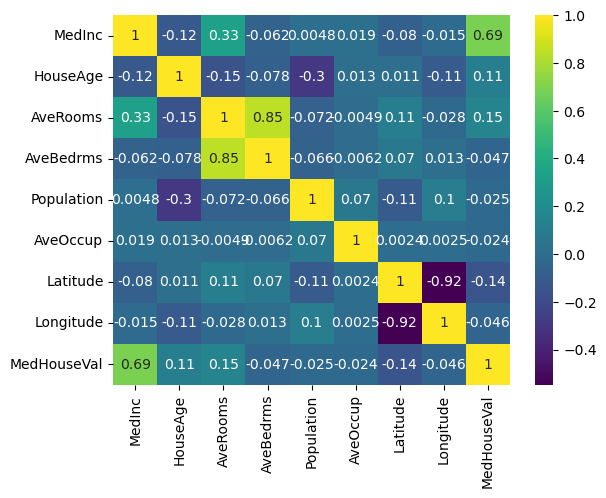

In [11]:
df = pd.concat([X, y], axis=1)
corr = df.corr()

# Plot heatmap with values inside cells
sns.heatmap(corr,
            cmap='viridis',
            robust=True,
            annot=True,
            fmt='.2g',
            cbar=True)
plt.show()


In [4]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [33]:
num_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

pre = ColumnTransformer([
    ('num', 'passthrough', num_features)
], remainder='drop', )

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

log_reg_model = Pipeline(steps=[
    ('pre', pre),
    ('poly', poly),
    ('scaler', StandardScaler()),
    ('regressor', LogisticRegression(max_iter=2000, C=1.0, penalty='l2', solver='lbfgs'))
])
lin_reg_model = Pipeline(steps=[
    ('pre', pre),
    ('poly', poly),
    ('scaler', StandardScaler()),
    ('regressor', RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]))
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.2)


In [30]:
# Create a binary target for logistic regression
# 1 if house value is above median, 0 otherwise
y_binary = (y > y.median()).astype(int)

# Check the class balance
print("Binary target value counts:")
print(y_binary.value_counts())


Binary target value counts:
MedHouseVal
0    10323
1    10317
Name: count, dtype: int64


In [31]:
X_bi_train, X_bi_test, y_bi_train, y_bi_test = train_test_split(X, y_binary, random_state=42,test_size=0.2)

In [34]:
log_reg_model.fit(X_bi_train, y_bi_train)
predicted_log_reg = log_reg_model.predict(X_bi_test)
print("Accuracy:", accuracy_score(y_bi_test, predicted_log_reg))
print("Precision:", precision_score(y_bi_test, predicted_log_reg))
print("Recall:", recall_score(y_bi_test, predicted_log_reg))
print("F1:", f1_score(y_bi_test, predicted_log_reg))

Accuracy: 0.8415697674418605
Precision: 0.8418991678903573
Recall: 0.8386153096050707
F1: 0.8402540302882266


In [35]:
lin_reg_model.fit(X_train, y_train)
predicted_lin_reg = lin_reg_model.predict(X_test)
rmse_lin = mean_squared_error(y_test, predicted_lin_reg) ** 0.5
r2_lin = r2_score(y_test,predicted_lin_reg)
print(f'RMSE: {rmse_lin},\nR2: {r2_lin}')

RMSE: 0.7439679309144032,
R2: 0.5776217261789034


In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load data
digits = load_digits()
X, y = digits.data, digits.target

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- A) Train logistic regression WITHOUT PCA ---
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print("Accuracy without PCA:", accuracy_score(y_test, y_pred))

# --- B) Train logistic regression WITH PCA (keep 95% variance) ---
pca = PCA(n_components=0.95)  # keep enough PCs to explain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf_pca = LogisticRegression(max_iter=2000)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
print("Accuracy with PCA:", accuracy_score(y_test, y_pred_pca))
print("Original features:", X.shape[1], " -> Reduced features:", X_train_pca.shape[1])

Accuracy without PCA: 0.9814814814814815
Accuracy with PCA: 0.9629629629629629
Original features: 64  -> Reduced features: 39
